In [ ]:
!pip install torch_geometric -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 616.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.1 MB/s eta 0:00:00


In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
from tqdm import tqdm
import folium
import matplotlib.pyplot as plt
import random

from torch_geometric.datasets import KarateClub, Amazon, CitationFull
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
from torch_geometric.nn import GCNConv

from torch import nn
import torch
from torch.nn import Linear, Module, CrossEntropyLoss
from torch.optim import Adam

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Задание 1. Создание и визуализация простых графов

## 1.

1\.1\. Создать функцию генерирующую кольцевой граф из n узлов (n - параметр функции)

1\.2\. Визуализировать граф, построенный с помощью фукнции из задания 1.

Документация:
* https://networkx.github.io/documentation/stable/tutorial.html#drawing-graphs
* https://networkx.github.io/documentation/stable/reference/drawing.html


In [ ]:
def circle_graph(n):
    G = nx.circulant_graph(n, [1])
    return G

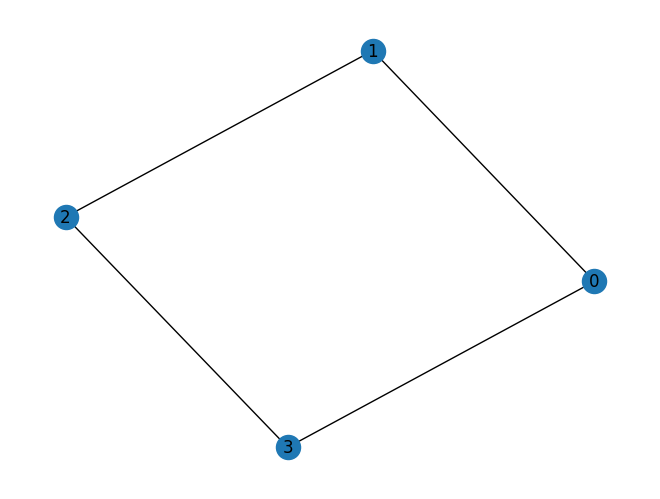

In [ ]:
G = circle_graph(4)
nx.draw(G, with_labels=True)

## 2.

2\.1\. Построить квадратную решетку 5 на 4 используя встроенную функцию NetworkX и визуализировать ее.

2\.2\. Реализовать собственную функцию создания квадратной решетки n на m. Создать с ее помощью решетку 5 на 4 и визуализировать ее.

2\.3\. Реализовать собственную функцию создания квадратной решетки n на m, которая сохраняет в графе информацию, позволяющую визуализировать решетку в виде решетки с узлами, занимающими соответствующие позиции на графике. Создать с ее помощью решетку 5 на 4 и визуализировать ее в виде "правильной" решетки.

2\.4\. Модифицировать функцию 2\.2\. так, чтобы рештку можно было замыкать по строкам и по столбцам (с помощью соответсвующих параметров функции). Проверить результат работы функции визуально.

2\.5-2\.8 Аналогичные задачи для треугольных решеток.

2\.9-2\.12\* Аналогичные задачи для гексогональных решеток.

### Квадратная решётка

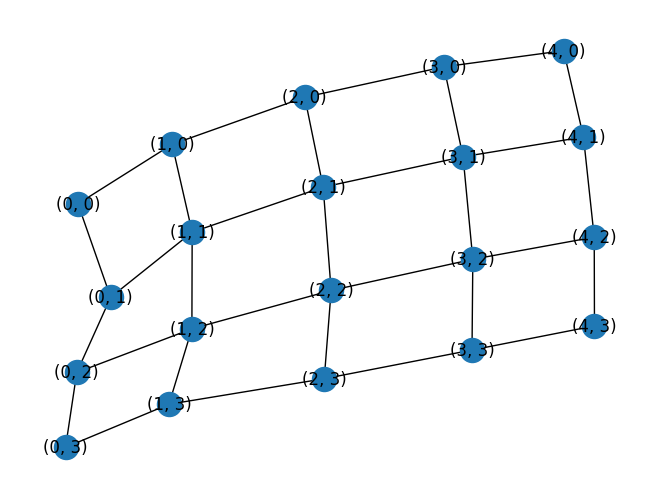

In [ ]:
G = nx.grid_2d_graph(5, 4)
nx.draw(G, with_labels=True)

In [ ]:
def square_grid(n, m):
    G = nx.Graph()
    nodes = [(i, j) for i in range(n) for j in range(m)]
    G.add_nodes_from(nodes)
    for i in range(n):
        for j in range(m):
            if i + 1 < n:
                G.add_edge((i, j), (i + 1, j))
            if j + 1 < m:
                G.add_edge((i, j), (i, j + 1))
    return G

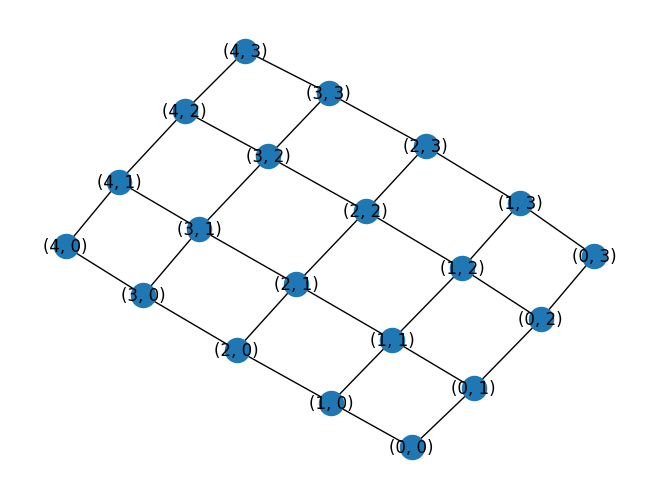

In [ ]:
grid = square_grid(5, 4)
nx.draw(grid, with_labels=True)

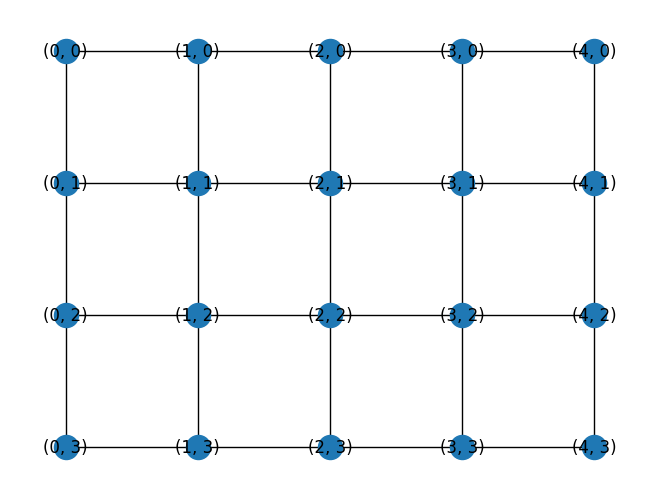

In [ ]:
def square_grid_with_pos(n, m):
    G = nx.Graph()
    for i in range(n):
        for j in range(m):
            G.add_node((i, j),pos=(i * 10, -j * 10))
            if i + 1 < n:
                G.add_edge((i, j), (i + 1, j))
            if j + 1 < m:
                G.add_edge((i, j), (i, j + 1))
    return G

grid_pos = square_grid_with_pos(5, 4)
pos = nx.get_node_attributes(grid_pos, 'pos')
nx.draw(grid_pos, pos, with_labels=True)

In [ ]:
def grid(n, m):
    G = nx.Graph()
    for j in range(m):
        w = 0
        for i in range(n):
            if i < n//2 + 1:
                w += 8
            else:
                w -= 8
            if n // 4 > i:
                G.add_node((i, j), pos=(n//4*10+5-i*10, -j*10-w))
            elif n // 4 * 3 < i:
                G.add_node((i, j),pos=(n//4*3*10-5-10*(i-n//4*3-1),-j*10-w))
            else:
                G.add_node((i, j),pos=(i*10,-j*10-w))
            if i + 1 < n:
                G.add_edge((i, j), (i + 1, j))
            if j + 1 < m:
                G.add_edge((i, j), (i, j + 1))
        for j in range(m):
            G.add_edge((0, j),(n - 1, j))
    return G

In [ ]:
n, m = 5, 4
grid = grid(n,m)
pos = nx.get_node_attributes(G,'pos')
G = nx.compose(G, G)
nx.draw(G,pos, with_labels = True)

### Треугольная решётка

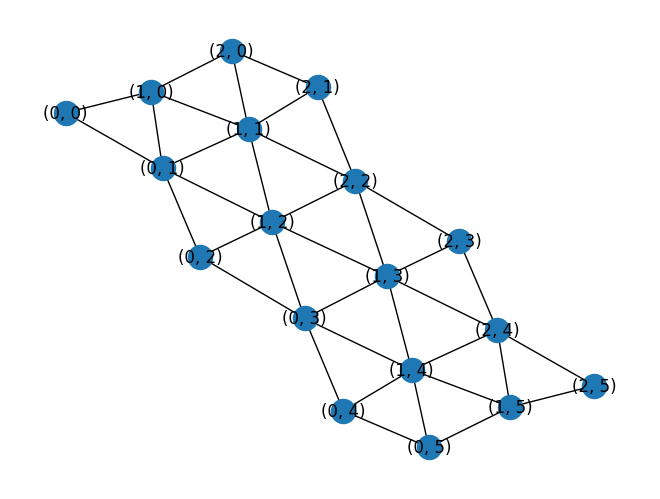

In [ ]:
G = nx.triangular_lattice_graph(5, 4)
nx.draw(G, with_labels=True)

In [ ]:
def triang_grid(n, m):
    G = nx.Graph()
    nodes = [(i, j) for i in range(n) for j in range(m)]
    G.add_nodes_from(nodes)
    for i in range(n):
        for j in range(m):
            if i < n - 1:
                G.add_edge((i, j), (i + 1, j))
            if j < m - 1:
                G.add_edge((i, j), (i, j + 1))
            if i + 1 < n and j - 1 >= 0:
                G.add_edge((i, j), (i + 1, j - 1))
    return G

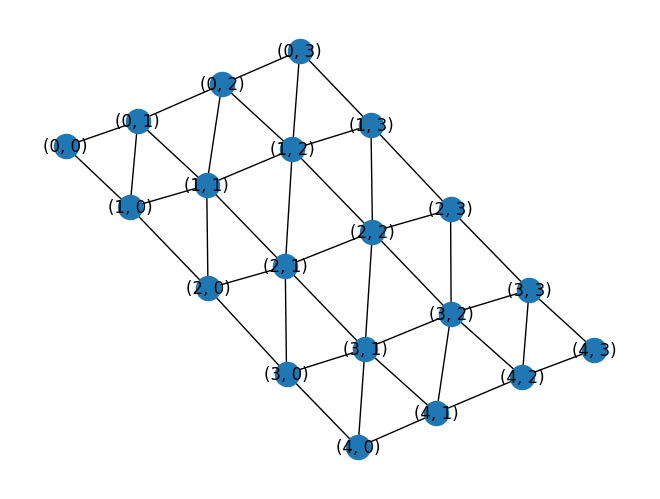

In [ ]:
G = triang_grid(5, 4)
nx.draw(G, with_labels=True)

In [ ]:
def triang_grid_with_pos(n, m):
    G = nx.Graph()
    for i in range(n):
        for j in range(m):
            G.add_node((i, j),pos=(i * 10, -j * 10))
            if i + 1 < n:
                G.add_edge((i, j), (i + 1, j))
            if j + 1 < m:
                G.add_edge((i, j), (i, j + 1))
            if i + 1 < n and j - 1 >= 0:
                G.add_edge((i, j), (i + 1, j - 1))
    return G

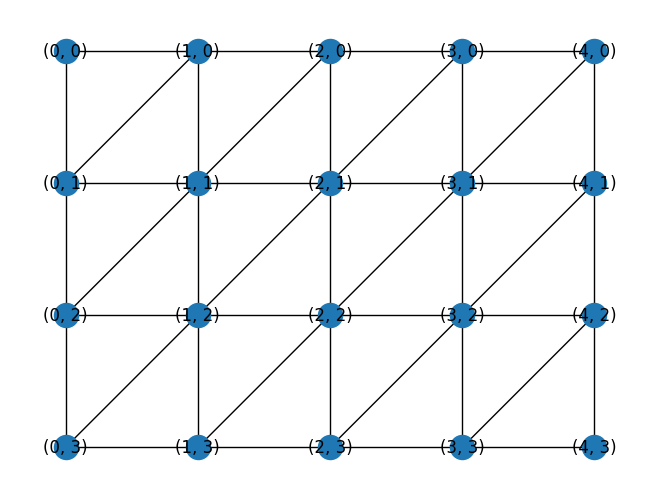

In [ ]:
triang_with_pos = triang_grid_with_pos(5, 4)
pos = nx.get_node_attributes(triang_with_pos, 'pos')
nx.draw(triang_with_pos, pos, with_labels=True)

## 3.

3\.
Граф «u,v цветок»: фрактальный граф, в котором на каждой итерации роста каждая связь заменяется на 2 пути, длинной u и v соответственно (см.рис).

__1,2 цветок:__
![1,2 цветок](1_2_fl.png "1,2 цветок")

__2,2 цветок:__
![2,2 цветок](2_2_fl.png "2,2 цветок")


3\.1\. Релизовать функцию построения 1,2 цветка. Функция принимает один целочисленный параметр n - количество шагов построения.

Для построенного граафа 1.2 цветка получить:

3\.2\. Количество узлов, количество связей, среднюю степень узла.

3\.3\. Визуализацию графа (с указанием идентификаторов узлов).

3\.4\. Степень каждого узла и сохранить информацию о ней в самом узле.

3\.5\. Визуализацию графа, в котрой размер узла определяется его степенью (с указанием идентификаторов узлов).

In [ ]:
def calc_center(G):
    x_c = 0
    y_c = 0
    for node in G.nodes:
        x_c += node[0]
        y_c += node[1]
    return x_c / len(G.nodes), y_c / len(G.nodes)

def sin(vec1, vec2):
    def to_zero(vec):
        x = vec[0]
        y = vec[1]
        return [x[0] - y[0], x[1] - y[1]]
    vec1 = to_zero(vec1)
    vec2 = to_zero(vec2)
    x1, y1 = vec1
    x2, y2 = vec2
    return x1 * y2 - y1 * x2

def add_node(a, b, h, node_center, edge, center):
    node = (node_center[0] - a * h, node_center[1] - b * h)
    if sin((edge[0], node), edge) * sin((edge[0], center), edge) >= 0:
        node = (node_center[0] + a * h, node_center[1] + b * h)
    return node

def flower_1_2(G, n):
    for _ in range(n):
        edges_to_add = []
        nodes_to_add = []
        center = calc_center(G)
        for edge in G.edges():
            node1, node2 = edge
            x1, y1 = np.array(node1)
            x2, y2 = np.array(node2)
            edge_center = ((x1 + x2) / 2, (y1 + y2) / 2)
            a, b = (y2 - y1) / (x2 - x1), -1
            l = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
            h = l / 6
            new_node = add_node(a, b, h, edge_center, edge, center)
            if new_node in G.nodes():
                new_node = add_node(a, b, h / 2, edge_center, edge, center)
            nodes_to_add.append((new_node, {'pos': new_node}))
            edges_to_add.append((node1, new_node))
            edges_to_add.append((node2, new_node))
        G.add_nodes_from(nodes_to_add)
        G.add_edges_from(edges_to_add)


In [ ]:
g = nx.Graph()
g.add_node((1, 0), pos=(1, 0))
g.add_node((0, 0), pos=(0, 0))
g.add_node((0.5, 0.5), pos=(0.5, 0.5))

g.add_edge((0, 0), (1, 0))
g.add_edge((0, 0), (0.5, 0.5))
g.add_edge((1, 0), (0.5, 0.5))

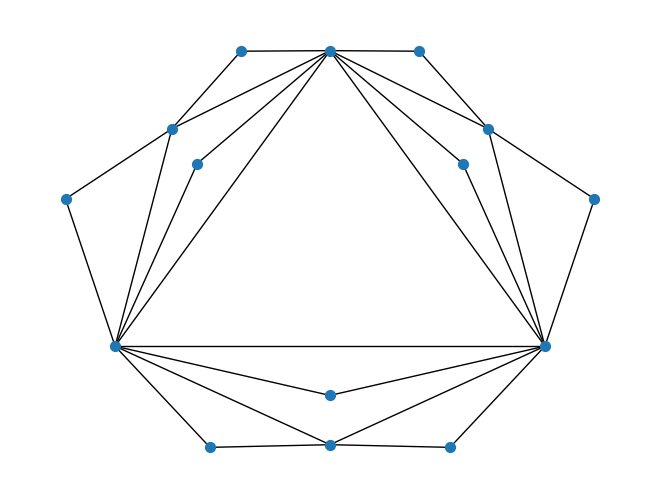

In [ ]:
flower_1_2(g, 2)
nx.draw(g, pos=nx.get_node_attributes(g, 'pos'), node_size=50)

In [ ]:
print("Количество вершин:", len(g.nodes()))
print("Количество ребер:", len(g.edges()))
print("Средняя степень узла:", sum(dict(g.degree()).values()) / len(g.nodes()))

Количество вершин: 15
Количество ребер: 27
Средняя степень узла: 3.6


In [ ]:
for v in g.nodes():
    g.nodes[v]['degree'] = g.degree(v)
g.nodes[(0, 0)]

{'pos': (0, 0), 'degree': 8}

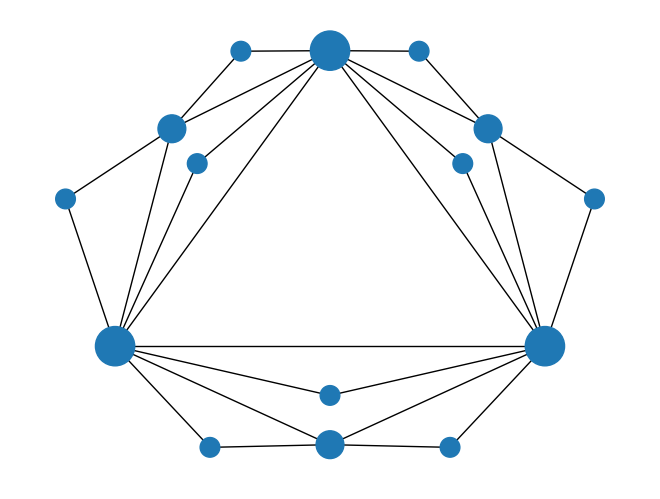

In [ ]:
nx.draw(g, nx.get_node_attributes(g, 'pos'),
        node_size=list(map(lambda x: x * 100, list(nx.get_node_attributes(g, 'degree').values()))))

## 4.

Для построенного граафа 1.2 цветка получить:

4\.1 Значение коэфициента кластеризации каждого узла и сохранить информацию о ней в самом узле.

4\.2 Визуализацию графа, в котрой размер узла определяется его коэффициентом кластреизации.

4\.5 Визуализацию графа, в котрой цвет узла определяется его коэффициентом кластреизации.

4\.6 Визуализацию графа, в котрой коэффициентом кластреизации демонстрируется в подписи к узлу.

4\.7 Среднее значение коэффицента кластеризации для всего графа. (? разные)

In [ ]:
cluster_coefs = nx.clustering(g)
for v in g.nodes():
    g.nodes[v]['cluster_coef'] = cluster_coefs[v]
g.nodes[(0, 0)]

{'pos': (0, 0), 'degree': 8, 'cluster_coef': 0.25}

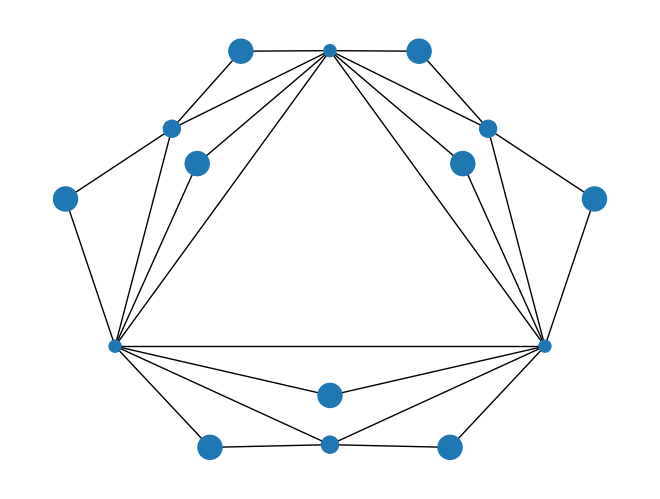

In [ ]:
nx.draw(g, nx.get_node_attributes(g, 'pos'),
        node_size=list(map(lambda x: x * 300, list(nx.get_node_attributes(g, 'cluster_coef').values()))))

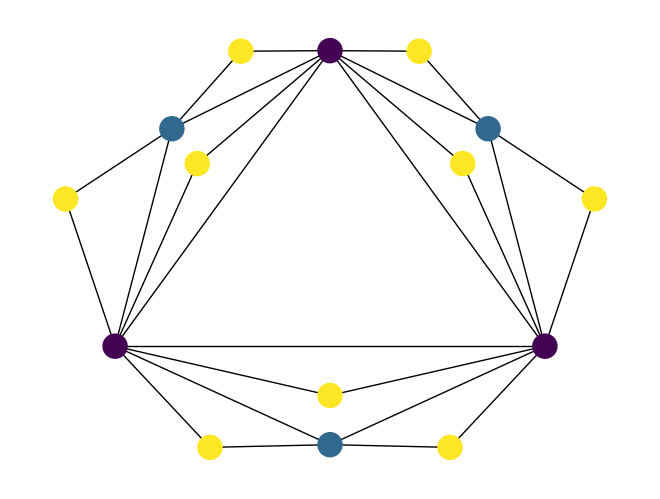

In [ ]:
nx.draw(g, nx.get_node_attributes(g, 'pos'),
        node_color=list(map(lambda x: x * 300, list(nx.get_node_attributes(g, 'cluster_coef').values()))))

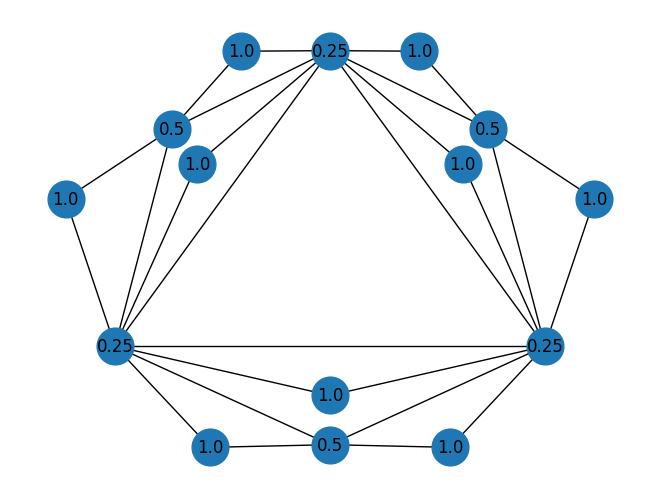

In [ ]:
nx.draw(g, nx.get_node_attributes(g, 'pos'),
        labels=nx.get_node_attributes(g, 'cluster_coef'),
        node_size=700)

In [ ]:
print("Среднее значение коэффициента кластеризации:", np.mean(list(cluster_coefs.values())))

Среднее значение коэффициента кластеризации: 0.75


## 5.

Для построенного граафа 1.2 цветка получить:

4\.1 Распределение степеней узлов в виде списка картежей вида: (степень, количество\_узлов\_с\_данной\_степенью), картежи в списке отсортированы по возрастанию степени.

4\.2 График распределения степеней узлов.4

4\.3 График распределения степеней узлов, в котором по вертикальной оси откладыватся выборочная частота. Отобразить график в трех масштабах осей: (x, y), (x, ln y), (ln x, ln y).

In [ ]:
from collections import Counter
sorted(list(dict(Counter(list(dict(g.degree()).values()))).items()), key=lambda x: x[0])

[(2, 9), (4, 3), (8, 3)]

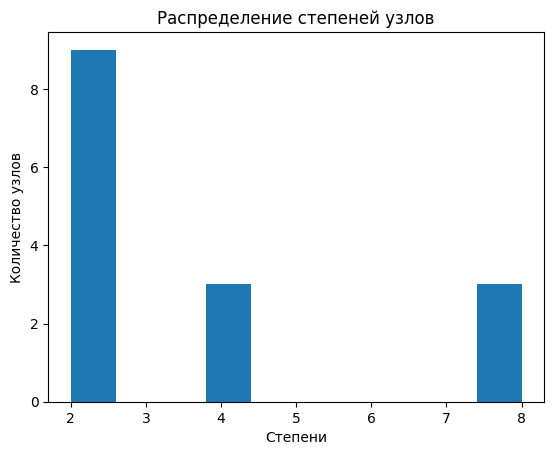

In [ ]:
plt.hist(list(dict(g.degree()).values()))
plt.title("Распределение степеней узлов")
plt.xlabel("Степени")
plt.ylabel("Количество узлов")
plt.show()

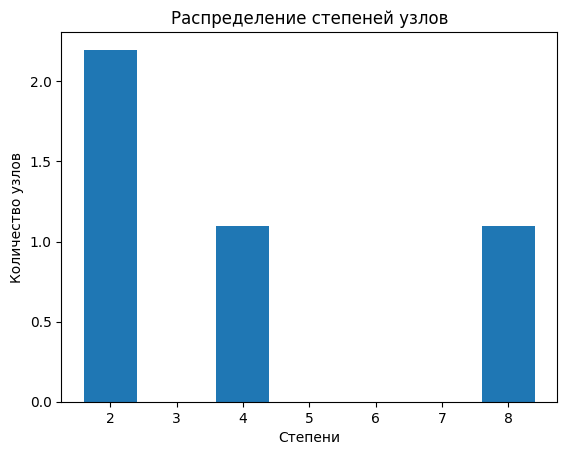

In [ ]:
dist = list(dict(Counter(list(dict(g.degree()).values()))).items())
plt.bar([x[0] for x in dist], [np.log(x[1]) for x in dist])
plt.title("Распределение степеней узлов")
plt.xlabel("Степени")
plt.ylabel("Логарифм количества узлов")
plt.show()

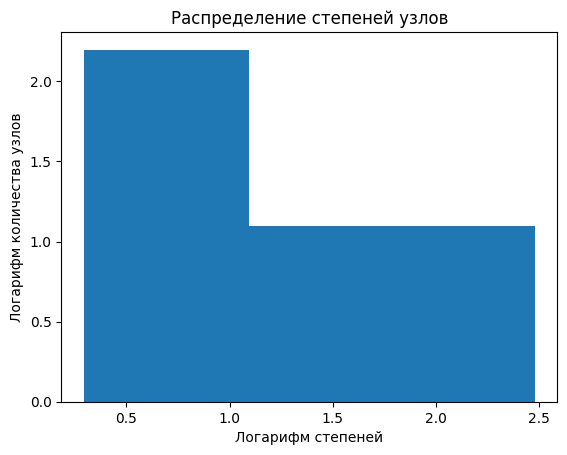

In [ ]:
dist = list(dict(Counter(list(dict(g.degree()).values()))).items())
plt.bar([np.log(x[0]) for x in dist], [np.log(x[1]) for x in dist])
plt.title("Распределение степеней узлов")
plt.xlabel("Логарифм степеней")
plt.ylabel("Логарифм количества узлов")
plt.show()

## 6.

Для построенного граафа 1.2 цветка получить:

5\.1\. Два произвольных узла и кратчайший путь между ними.

5\.2\. Визуализировать кратчайший путь, полученный в предыдущем пункте, используя связи другого цвета и другой толщины.

5\.3\. Средний кратчайший путь для всего графа.

5\.4\. Диаметр графа.

In [ ]:
arbitrary_nodes = random.choices(list(g.nodes()), k=2)
print("Произвольные вершины:", arbitrary_nodes)
shortest_path = nx.shortest_path(g, arbitrary_nodes[0], arbitrary_nodes[1])
print("Кратчайший путь:", shortest_path)
shortest_path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]

Произвольные вершины: [(-0.11526300724634433, 0.24907022842975995), (0.2926715065801033, 0.49907022842975995)]
Кратчайший путь: [(-0.11526300724634433, 0.24907022842975995), (0.13214886980224205, 0.36785113019775795), (0.2926715065801033, 0.49907022842975995)]


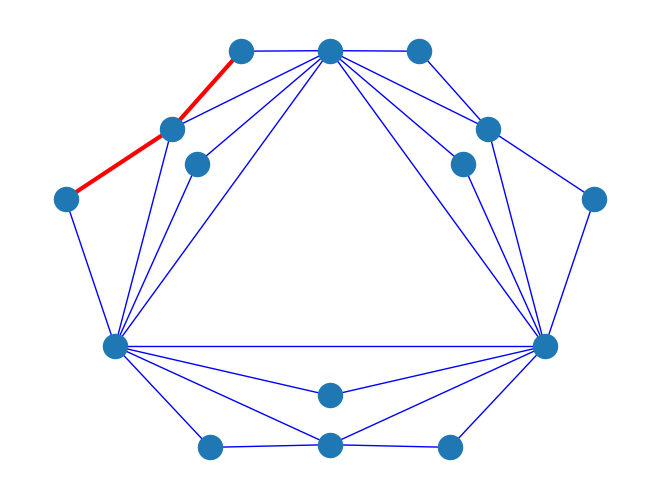

In [ ]:
def reverse_edge(edge):
    return edge[1], edge[0]

edges_colors = []
edges_widths = []
for edge in g.edges():
    if edge in shortest_path_edges or reverse_edge(edge) in shortest_path_edges:
        edges_colors.append('red')
        edges_widths.append(3)
    else:
        edges_colors.append('blue')
        edges_widths.append(1)

nx.draw(g, nx.get_node_attributes(g, 'pos'),
        edge_color=edges_colors,
        width=edges_widths)

In [ ]:
print(f"Средняя длина кратчайших путей графа: {nx.average_shortest_path_length(g):.5f}")

Средняя длина кратчайших путей графа: 1.94286


In [ ]:
print(f"Диаметр графа: {nx.diameter(g)}")

Диаметр графа: 3


# Задание 2

Построить любой фрактальный граф, задав его структуру при помощи формул и параметров фрактала

Рассчитать среднюю степень вершины фрактального графа

Построить распределение степеней вершин фрактального графа

Модифицировать исходные формулы и параметры фрактала и повторить задание с 1 по 3.

In [ ]:
import copy
def create_fractal(n):
    g = nx.Graph()
    g.add_node((1, 0), pos=(1, 0))
    g.add_node((0, 0), pos=(0, 0))
    g.add_node((0.5, np.sqrt(3/2)), pos=(0.5, np.sqrt(3/2)))

    g.add_edge((0, 0), (1, 0))
    g.add_edge((0, 0), (0.5, np.sqrt(3/2)))
    g.add_edge((1, 0), (0.5, np.sqrt(3/2)))
    cur_edges = list(g.edges)
    for _ in range(n):
        edges_to_add = []
        nodes_to_add = []

        node1, node2 = cur_edges[0]
        x1, y1 = np.array(node1)
        x2, y2 = np.array(node2)
        first_edge_center = ((x1 + x2) / 2, (y1 + y2) / 2)

        prev_edge_center = first_edge_center
        nodes_to_add.append((prev_edge_center, {'pos': prev_edge_center}))
        for edge in cur_edges[1:]:
            node1, node2 = edge
            x1, y1 = np.array(node1)
            x2, y2 = np.array(node2)
            edge_center = ((x1 + x2) / 2, (y1 + y2) / 2)

            nodes_to_add.append((edge_center, {'pos': edge_center}))
            edges_to_add.append((edge_center, prev_edge_center))
            g.add_edge(node1, edge_center)
            g.add_edge(node2, edge_center)
            prev_edge_center = edge_center
        edges_to_add.append((first_edge_center, prev_edge_center))
        g.add_nodes_from(nodes_to_add)
        g.add_edges_from(edges_to_add)
        cur_edges = copy.deepcopy(edges_to_add)
    return g

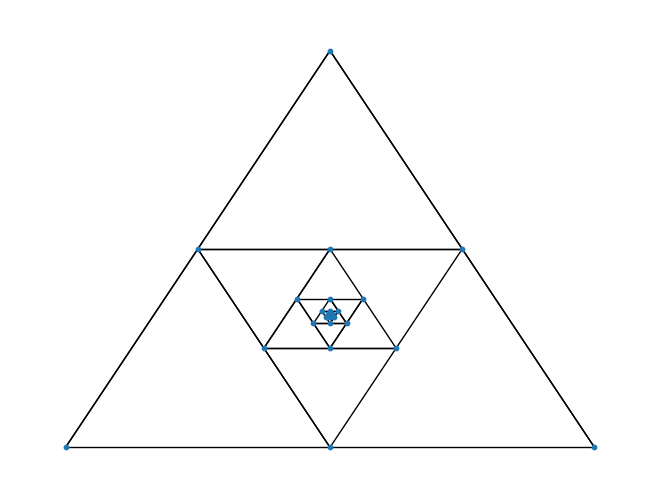

In [ ]:
fractal = create_fractal(10)
nx.draw(fractal, pos=dict(zip(nx.get_node_attributes(fractal, 'pos'), nx.get_node_attributes(fractal, 'pos'))), node_size=10)

In [ ]:
print("Средняя степень вершины фрактального графа:", sum(dict(fractal.degree()).values()) / len(fractal.nodes()))

Средняя степень вершины фрактального графа: 4.424242424242424


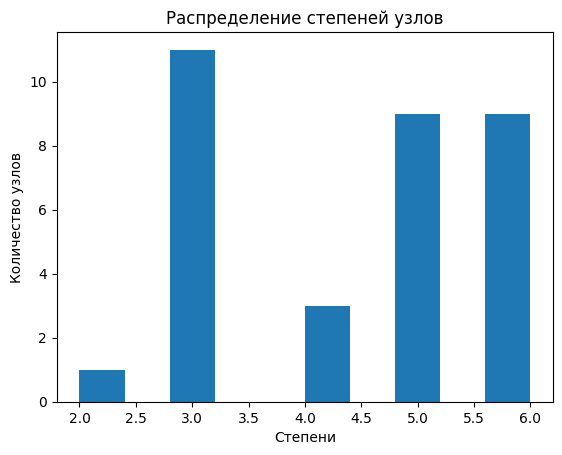

In [ ]:
plt.hist(list(dict(fractal.degree()).values()))
plt.title("Распределение степеней узлов")
plt.xlabel("Степени")
plt.ylabel("Количество узлов")
plt.show()

In [ ]:
import copy
def create_fractal2(n):
    g = nx.Graph()
    g.add_node((1, 0), pos=(1, 0))
    g.add_node((0, 0), pos=(0, 0))
    g.add_node((0.5, np.sqrt(3/2)), pos=(0.5, np.sqrt(3/2)))

    g.add_edge((0, 0), (1, 0))
    g.add_edge((0, 0), (0.5, np.sqrt(3/2)))
    g.add_edge((1, 0), (0.5, np.sqrt(3/2)))
    cur_edges = list(g.edges)
    for _ in range(n):
        edges_to_add = []
        nodes_to_add = []

        node1, node2 = cur_edges[0]
        x1, y1 = np.array(node1)
        x2, y2 = np.array(node2)
        first_edge_center = ((x1 + x2) / 3, (y1 + y2) / 3)

        prev_edge_center = first_edge_center
        nodes_to_add.append((prev_edge_center, {'pos': prev_edge_center}))
        for edge in cur_edges[1:]:
            node1, node2 = edge
            x1, y1 = np.array(node1)
            x2, y2 = np.array(node2)
            edge_center = ((x1 + x2) / 3, (y1 + y2) / 3)

            nodes_to_add.append((edge_center, {'pos': edge_center}))
            edges_to_add.append((edge_center, prev_edge_center))
            g.add_edge(node1, edge_center)
            g.add_edge(node2, edge_center)
            prev_edge_center = edge_center
        edges_to_add.append((first_edge_center, prev_edge_center))
        g.add_nodes_from(nodes_to_add)
        g.add_edges_from(edges_to_add)
        cur_edges = copy.deepcopy(edges_to_add)
    return g

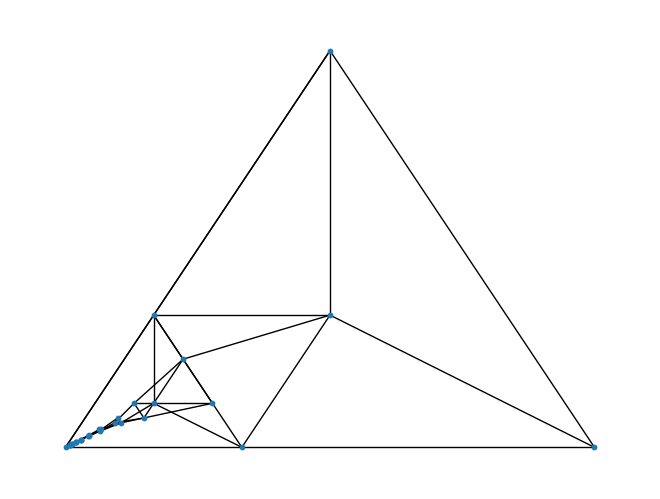

In [ ]:
fractal2 = create_fractal2(10)
nx.draw(fractal2, pos=dict(zip(nx.get_node_attributes(fractal2, 'pos'), nx.get_node_attributes(fractal2, 'pos'))), node_size=10)

In [ ]:
print("Средняя степень вершины фрактального графа:", sum(dict(fractal2.degree()).values()) / len(fractal2.nodes()))

Средняя степень вершины фрактального графа: 4.4375


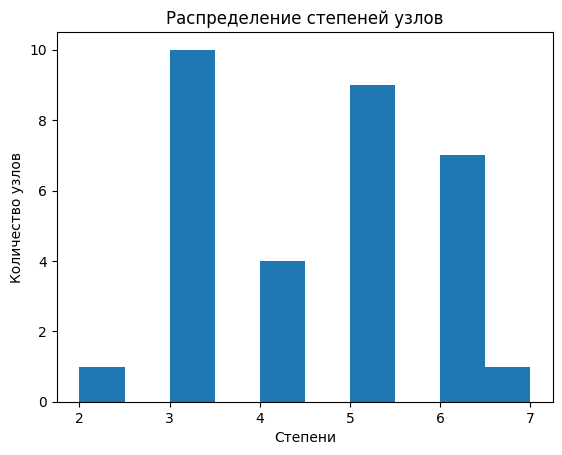

In [ ]:
plt.hist(list(dict(fractal2.degree()).values()))
plt.title("Распределение степеней узлов")
plt.xlabel("Степени")
plt.ylabel("Количество узлов")
plt.show()

# Задание 3
Выбрать (скачать) самостоятельно датасет (например, с kaggle.com) и построить граф с географической привязкой данных

Для решения задания использовать методы библиотеки networkx(источник: networkx.org)

Рассчитать среднюю степень вершины, средний минимальный путь и диаметр полученного графа

Проанализировать и выявить закономерности при их наличии (например, специфика регионов и т.п.)

In [ ]:
!unzip /content/new_york_taxi.zip

Archive:  /content/new_york_taxi.zip
  inflating: test.csv                


## Удаляем выбросы, чтобы получить наиболее связный граф по исходным данным

In [ ]:
data = pd.read_csv("test.csv")
len(data)

625134

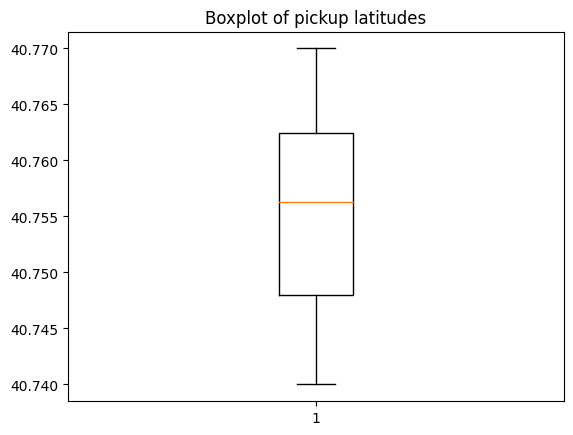

In [ ]:
plt.boxplot(data.pickup_latitude)
plt.title("Boxplot of pickup latitudes")
plt.show()

In [ ]:
data = data[(data.pickup_latitude.to_numpy() >= 40.745) & (data.pickup_latitude.to_numpy() <= 40.765)]

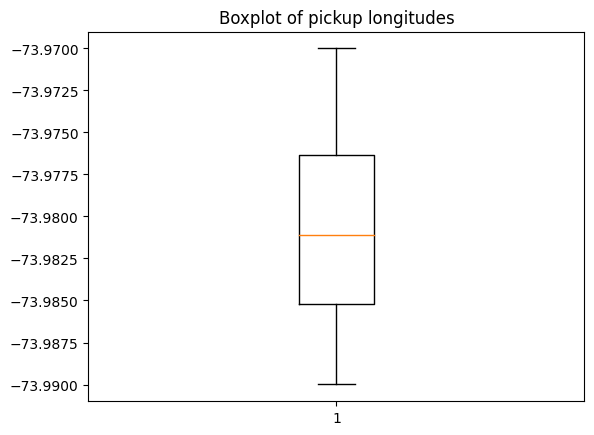

In [ ]:
plt.boxplot(data.pickup_longitude)
plt.title("Boxplot of pickup longitudes")
plt.show()

In [ ]:
data = data[(data.pickup_longitude.to_numpy() >= -73.99) & (data.pickup_longitude.to_numpy() <= -73.98)]

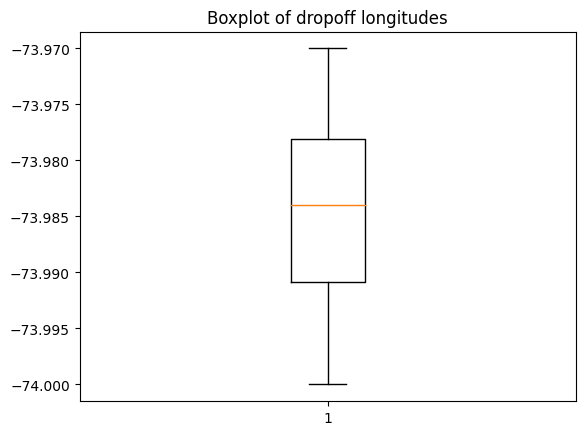

In [ ]:
plt.boxplot(data.dropoff_longitude)
plt.title("Boxplot of dropoff longitudes")
plt.show()

In [ ]:
data = data[(data.dropoff_longitude.to_numpy() >= -73.99) & (data.dropoff_longitude.to_numpy() <= -73.98)]

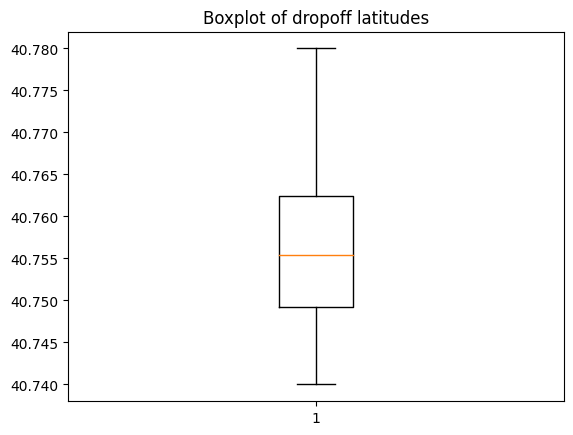

In [ ]:
plt.boxplot(data.dropoff_latitude)
plt.title("Boxplot of dropoff latitudes")
plt.show()

In [ ]:
data = data[(data.dropoff_latitude.to_numpy() >= 40.745) & (data.dropoff_latitude.to_numpy() <= 40.765)]

In [ ]:
len(data)

6827

## Отражение точек на карте и анализ свойств графа

In [ ]:
# Из-за ограничений памяти будем выводить не все ноды, а случайные 50
import random
idxs_to_display = random.choices(np.arange(0, len(data)), k=50)
data_to_display = data.iloc[idxs_to_display]

In [ ]:
def add_to_map(df):
    for i, row in tqdm(df.iterrows()):
        node1 = [round(row.pickup_latitude, 5), round(row.pickup_longitude, 5)]
        node2 = [round(row.dropoff_latitude, 5), round(row.dropoff_longitude, 5)]
        folium.Marker(location=node1).add_to(map)
        folium.Marker(location=node2).add_to(map)

map = folium.Map(location=[data_to_display.pickup_latitude.to_numpy().mean(), data_to_display.pickup_longitude.to_numpy().mean()],
                 zoom_start=12)

In [ ]:
add_to_map(data_to_display)

50it [00:00, 4324.56it/s]


In [ ]:
def add_trips_to_map(df):
    for i, row in tqdm(df.iterrows()):
        node1 = [round(row.pickup_latitude, 5), round(row.pickup_longitude, 5)]
        node2 = [round(row.dropoff_latitude, 5), round(row.dropoff_longitude, 5)]
        folium.PolyLine([node1, node2]).add_to(map)

add_trips_to_map(data_to_display)

50it [00:00, 3356.41it/s]


In [ ]:
map

In [ ]:
def add_to_graph(df):
    for i, row in tqdm(df.iterrows()):
        node1 = (round(row.pickup_longitude, 3), round(row.pickup_latitude, 3))
        node2 = (round(row.dropoff_longitude, 3), round(row.dropoff_latitude, 3))
        g.add_nodes_from([(node1, {"pos": node1}),
                        (node2, {"pos": node2})
                        ])
        g.add_edge(node1, node2)

g = nx.Graph()

In [ ]:
add_to_graph(data)

6827it [00:00, 8683.74it/s]


In [ ]:
print("Количество компонент связности:", len(list(nx.connected_components(g))))

Количество компонент связности: 1


In [ ]:
print("Средняя степень вершины графа:", sum(dict(g.degree()).values()) / len(g.nodes()))
print(f"Средняя длина минимальных путей графа: {nx.average_shortest_path_length(g):.5f}")
print(f"Диаметр графа: {nx.diameter(g)}")

Средняя степень вершины графа: 42.5938864628821
Средняя длина минимальных путей графа: 1.86647
Диаметр графа: 4


# Задание 4

Изучить статью о GCN по ссылке: https://nuancesprog.ru/p/18983/ в том числе изучить описание датасета, который используется в данной статье.

Скачать пример кода GCN из указанной статьи и проверить его работоспособность

Заменить в примере кода исходный датасет по карате клубу на любой другой датасет и решить задачу классификации (в новом датасете должны быть как минимум 4 категории сущностей, которые подлежат классификации).

Сравнить точность GCN с другими моделями

## Проверка оригинального кода на работоспособность

In [ ]:
data = KarateClub()

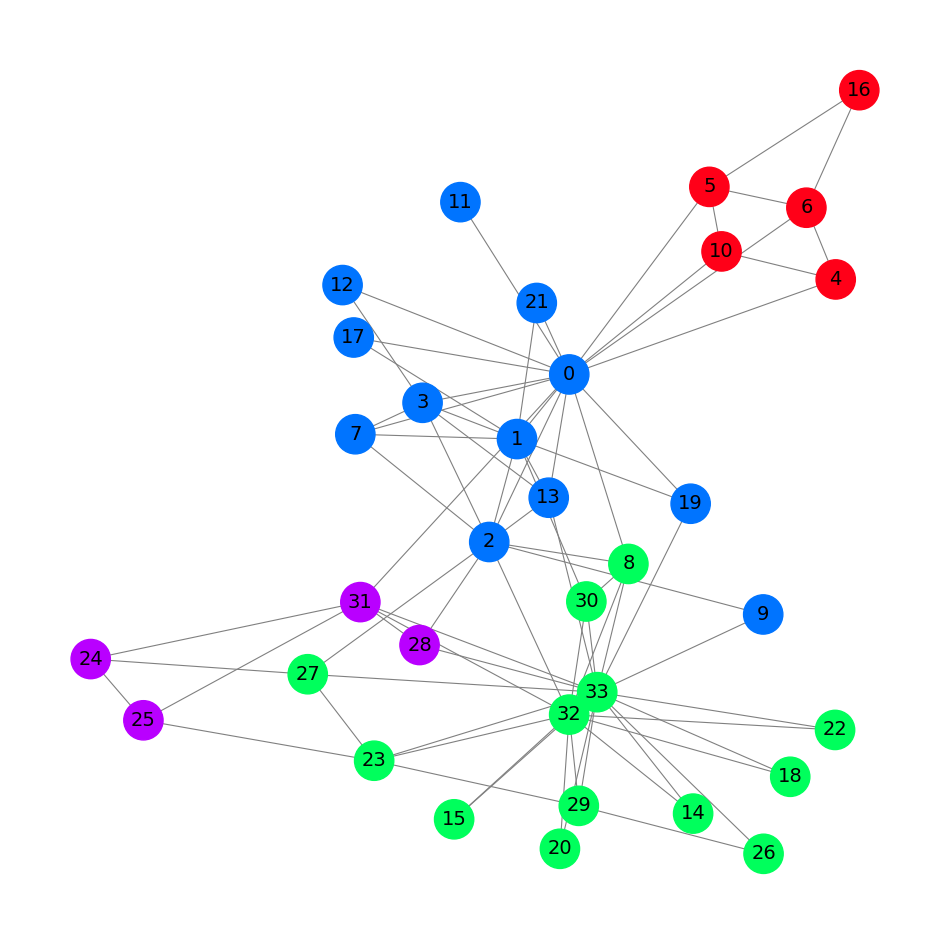

In [ ]:
G = to_networkx(Data(edge_index=data.edge_index, num_nodes=data.y.shape[0]), to_undirected=True)
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                pos=nx.spring_layout(G, seed=0),
                with_labels=True,
                node_size=800,
                node_color=data.y,
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.8,
                edge_color="grey",
                font_size=14
                )
plt.show()

In [ ]:
class GCN(Module):
    def __init__(self, num_features, num_classes, hidden_dim=3):
        super().__init__()
        self.gcn = GCNConv(num_features, hidden_dim)
        self.out = Linear(hidden_dim, num_classes)

    def forward(self, x, edge_index):
        h = self.gcn(x, edge_index).relu()
        z = self.out(h)
        return h, z

In [ ]:
def accuracy(pred_y, y):
    return (pred_y == y).sum() / len(y)

def train(model, data, optimizer, criterion, n_epochs):
    losses = []
    accuracies = []
    outputs = []
    for epoch in range(n_epochs):
        optimizer.zero_grad()
        h, z = model(data.x, data.edge_index)
        loss = criterion(z, data.y)
        acc = accuracy(z.argmax(dim=1), data.y)

        loss.backward()
        optimizer.step()

        losses.append(loss)
        accuracies.append(acc)
        outputs.append(z.argmax(dim=1))

        if epoch % 10 == 0:
            print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')
    return losses, accuracies, outputs

In [ ]:
model = GCN(data.num_features, data.num_classes)
criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.02)
n_epochs = 61

losses, accuracies, outputs = train(model, data, optimizer, criterion, n_epochs)

Epoch   0 | Loss: 1.48 | Acc: 35.29%
Epoch  10 | Loss: 1.26 | Acc: 35.29%
Epoch  20 | Loss: 1.01 | Acc: 64.71%
Epoch  30 | Loss: 0.78 | Acc: 70.59%
Epoch  40 | Loss: 0.55 | Acc: 73.53%
Epoch  50 | Loss: 0.38 | Acc: 97.06%
Epoch  60 | Loss: 0.26 | Acc: 100.00%


In [ ]:
%%capture
from IPython.display import HTML
from matplotlib import animation
plt.rcParams["animation.bitrate"] = 3000

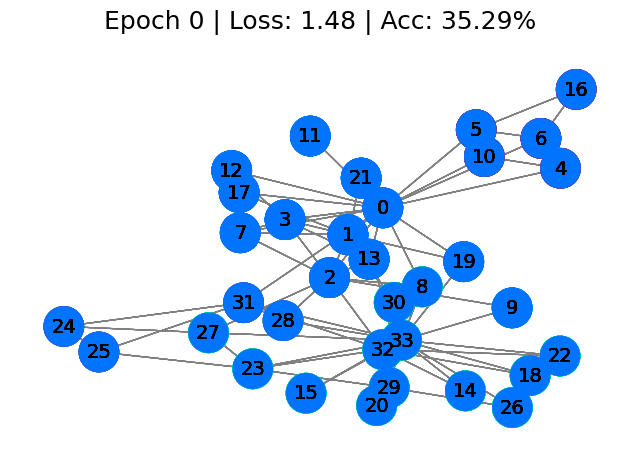

In [ ]:
def animate(i):
    G = to_networkx(Data(edge_index=data.edge_index, num_nodes=data.y.shape[0]), to_undirected=True)
    nx.draw_networkx(G,
                    pos=nx.spring_layout(G, seed=0),
                    with_labels=True,
                    node_size=800,
                    node_color=outputs[i],
                    cmap="hsv",
                    vmin=-2,
                    vmax=3,
                    width=0.8,
                    edge_color="grey",
                    font_size=14
                    )
    plt.title(f'Epoch {i} | Loss: {losses[i]:.2f} | Acc: {accuracies[i]*100:.2f}%',
              fontsize=18, pad=20)

fig = plt.figure(figsize=(8, 5))
plt.axis('off')

anim = animation.FuncAnimation(fig, animate, \
            np.arange(0, n_epochs, 10), interval=500, repeat=True)
html = HTML(anim.to_html5_video())
display(html)

Всё работает

## Замена исходного датасета на другой

In [ ]:
data = Amazon(root="/content/", name="Photo")

Processing...
Done!


Amazon -- это встроенный датасет pytorch_geometric со следующими характеристиками:

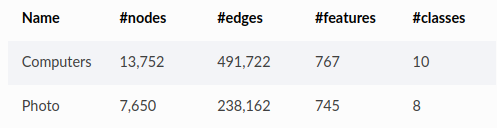

In [ ]:
data.x.shape

torch.Size([7650, 745])

In [ ]:
model = GCN(data.num_features, data.num_classes, hidden_dim=100)
criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.02)
n_epochs = 101

losses, accuracies, outputs = train(model, data, optimizer, criterion, n_epochs)

Epoch   0 | Loss: 2.02 | Acc: 11.10%
Epoch  10 | Loss: 1.74 | Acc: 39.18%
Epoch  20 | Loss: 0.93 | Acc: 80.65%
Epoch  30 | Loss: 0.56 | Acc: 83.90%
Epoch  40 | Loss: 0.37 | Acc: 90.67%
Epoch  50 | Loss: 0.30 | Acc: 92.00%
Epoch  60 | Loss: 0.26 | Acc: 93.14%
Epoch  70 | Loss: 0.23 | Acc: 94.01%
Epoch  80 | Loss: 0.20 | Acc: 94.48%
Epoch  90 | Loss: 0.19 | Acc: 94.90%
Epoch 100 | Loss: 0.17 | Acc: 95.25%


## Сравнение с логистической регрессией

In [ ]:
logreg = LogisticRegression(max_iter=500, C=0.7).fit(data.x, data.y)
y_preds = logreg.predict(data.x)
print(f"accuracy: {accuracy_score(data.y, y_preds):.5f}")

accuracy: 0.99974


Логрегрессия конкретно на этом небольшом датасете показывает результаты, сравнимые с GCN, однако при более сложной структуре данных, где таргет не выражается линейно через признаки и где он зависит ещё и от рёбер, GCN явно будет лучше

# Задание 5

Изучить статью о GCN по ссылке: https://nuancesprog.ru/p/6417/ в том числе изучить описание датасета, который используется в данной статье.

Реализовать на основе кода, представленного в статье, графовую рекурентную нейросеть

Сравнить точность полученной модели с другими моделями

In [ ]:
class RNN(nn.Module):
    def __init__(self, n_features, hidden_dim, n_layers, n_classes):
        super(RNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        self.rnn = nn.RNN(n_features, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, n_classes)

    def forward(self, x):
        h0 = torch.zeros(self.n_layers, self.hidden_dim).requires_grad_()
        out, hn = self.rnn(x, h0.detach())
        out = self.fc(out)
        return out

In [ ]:
def train(model, data, optimizer, criterion, n_epochs):
    losses = []
    accuracies = []
    outputs = []
    for epoch in range(n_epochs):
        optimizer.zero_grad()
        z = model(data.x)
        loss = criterion(z, data.y)
        acc = accuracy(z.argmax(dim=1), data.y)

        loss.backward()
        optimizer.step()

        losses.append(loss)
        accuracies.append(acc)
        outputs.append(z.argmax(dim=1))

        if epoch % 10 == 0:
            print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')
    return losses, accuracies, outputs

In [ ]:
model = RNN(n_features=data.num_features, hidden_dim=100, n_layers=2, n_classes=data.num_classes)
criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.02)
n_epochs = 101

losses, accuracies, outputs = train(model, data, optimizer, criterion, n_epochs)

Epoch   0 | Loss: 2.04 | Acc: 21.29%
Epoch  10 | Loss: 1.47 | Acc: 49.62%
Epoch  20 | Loss: 0.76 | Acc: 76.22%
Epoch  30 | Loss: 0.40 | Acc: 88.16%
Epoch  40 | Loss: 0.22 | Acc: 93.82%
Epoch  50 | Loss: 0.14 | Acc: 96.51%
Epoch  60 | Loss: 0.08 | Acc: 98.38%
Epoch  70 | Loss: 0.05 | Acc: 99.15%
Epoch  80 | Loss: 0.03 | Acc: 99.49%
Epoch  90 | Loss: 0.02 | Acc: 99.59%
Epoch 100 | Loss: 0.02 | Acc: 99.71%


Мы видим, что у RNN accuracy получилось выше, чем у GCN.

# Задание 6

Построить базу знаний в любой предметной области, сформировав массив документов (например, публикаций или файлов на каком-либо портале или набор файлов на компьютере или сервере и т.п.) и построить граф знаний об этих документах

Реализовать сервис краткого описания каждого документа в базе знаний (абстракт, автореферат - summary)

Реализовать сервис поиска по запросу внутри базы знаний

In [ ]:
import json
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import re

In [ ]:
def parse_nature(n_pages):
    news_base = []
    for page in tqdm(range(1, n_pages + 1), desc="Parsing pages:"):
        websites = parse_page(page)
        for website in websites:
            news_base.append(parse_website(website))
    return news_base


def parse_page(page):
    nature = f"https://www.nature.com/latest-news?page={page}"
    response = requests.get(nature)
    soup_nature = BeautifulSoup(response.text, "html.parser")
    articles_lst = soup_nature.findAll('a', {"data-track": "click"})

    websites = []
    for article in articles_lst:
        if '/articles/' in article['href']:
            websites.append('https://www.nature.com' + article['href'])
    return websites


def parse_website(url):
    response = requests.get(url)
    soup_website = BeautifulSoup(response.text, "html.parser")
    text = ""
    for p in soup_website.findAll('p', class_=None)[1:]:
        if len(list(p.children)) == 1:
            text += p.text + '\n'
    return re.sub(r"doi:.*", "", text)

In [ ]:
base = parse_nature(7)

Parsing pages:: 100%|██████████| 7/7 [03:25<00:00, 29.31s/it]


## Суммарайзер

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
def summarize(text):
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=400, min_length=80, num_beams=1)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

model_name = 't5-large'
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
summarize(base[2])

'genetic testing is helping researchers uncover connections between modern people and ancient people. the potential number of genealogical ancestors a person has doubles with each generation. but the information is incomplete and can be misunderstood. the findings could help researchers understand the migration patterns of people in the past. a new study is aiming to identify the origins of the elkhorn tribe.'

## Поиск по текстам

In [ ]:
!pip install langchain_community -q
!pip install langchain_fireworks -q
!pip install langchain_text_splitters -q
!pip install langchain_chroma -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.6/990.6 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.0/384.0 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.2/140.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.4/360.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/

In [ ]:
from langchain.docstore.document import Document
from langchain_fireworks import FireworksEmbeddings
from langchain_text_splitters import CharacterTextSplitter
from langchain_chroma import Chroma

In [ ]:
doc_base = []
for text in tqdm(base):
    doc = Document(page_content=text,
            metatdata={
                "source": "local"
            }
        )
    doc_base.append(doc)

100%|██████████| 175/175 [00:00<00:00, 11624.46it/s]


In [ ]:
doc_base = []
for text in tqdm(base):
    doc = Document(page_content=text,
            metatdata={
                "source": "local"
            }
        )
    doc_base.append(doc)

100%|██████████| 175/175 [00:00<00:00, 10994.82it/s]


In [ ]:
import os
if "FIREWORKS_API_KEY" not in os.environ:
    os.environ["FIREWORKS_API_KEY"] = API_KEY

In [ ]:
text_splitter = CharacterTextSplitter(chunk_size=500, chunk_overlap=0)
documents = text_splitter.split_documents(doc_base[:20])
db = Chroma.from_documents(documents, FireworksEmbeddings())

In [ ]:
documents = text_splitter.split_documents(doc_base[20:])
_ = db.add_documents(documents)

In [ ]:
query = "neural communication"
docs = db.similarity_search(query)
print(docs[0].page_content)

But the neural communication pathways are less understood. To find out more, neuroscientist Ivan de Araujo at the Max Planck Institute for Biological Cybernetics in Tübingen, Germany, and his colleagues focused on small organs called Brunner’s glands that are found in the walls of the small intestine. Little is known about these glands, other than that they produce mucus and contain numerous neurons.
The researchers then examined the glands’ neurons. They found that the neurons connect to fibres in the vagus nerve, a communications pathway between the gut and the brain. These fibres run directly to the brain’s amygdala, which is involved in emotion and stress response.
Asya Rolls, a neuroimmunologist at the Technion — Israel Institute of Technology in Haifa, is impressed by the direct line between the brain, Brunner’s glands, bacteria and immune system. “The specificity of the connection is amazing,” she says. But she cautions that the pathways in mice might not be identical to those i

In [ ]:
query = "Trump"
docs = db.similarity_search(query)
print(docs[0].page_content)

Earlier this month, the union representing thousands of scientists and engineers at the US Environmental Protection Agency (EPA) signed a new contract that includes protections for government workers who stand up for scientific integrity. A similar provision was included in a union contract at the US Department of Agriculture last year, and negotiators for the union representing more than 5,000 early-career scientists at the National Institutes of Health are following suit. A contract could be signed in the next several months.
If Trump wins November’s election, the next question is what will happen with the US Congress. If Republicans were to retain control over the House of Representatives and seize control of the Senate, Trump would have at least two years of free rein to reshape the government to his liking.
“People should not be confident that we have the legal tools to effectively respond to abuses of power in a second Trump administration,” says Blake Emerson, an administrative-

## Граф

In [ ]:
from nltk.tokenize import sent_tokenize
from tqdm import tqdm
import spacy
from nltk.corpus import stopwords
import nltk


nltk.download('punkt')
nltk.download('stopwords')
stops = set(stopwords.words('english'))
stops.update(['I', '’'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def get_sents(base):
    sentences = []
    for text in base:
        text_sentences = sent_tokenize(text)
        for sent in text_sentences:
            sentences.append(sent)
    return sentences


def get_triplets(sentences):
    def get_subj(word, cur_subj):
        if word.dep_ == "nsubj" or word.dep_ == "nsubjpass":
            return word.lemma_
        return cur_subj

    def get_obj(word, cur_obj):
        if word.dep_ == "iobj" or word.dep_ == "pobj" or word.dep_ == "dobj" or word.dep_ == "attr": #pobj возможно лишний
            return word.lemma_
        return cur_obj

    def get_verb(word, cur_verb):
        if word.pos_ == "VERB" or word.pos_ == "AUX" or word.dep_ == "ROOT":
            return word.lemma_
        return cur_verb

    nlp = spacy.load("en_core_web_sm")
    triplets = []
    for sent in tqdm(sentences):
        parsed_text = nlp(sent)
        subj, obj, verb = "", "", ""
        for word in parsed_text:
            subj = get_subj(word, subj)
            obj = get_obj(word, obj)
            verb = get_verb(word, verb)
            if len(subj) != 0 and len(obj) != 0 and len(verb) != 0:
                triplets.append((subj, obj, verb))
                subj, obj, verb = "", "", ""
    return triplets


In [ ]:
sentences = get_sents(base)
triplets = get_triplets(sentences)
len(triplets)

100%|██████████| 3269/3269 [00:55<00:00, 59.10it/s]


5936

In [ ]:
def get_word_freqs(triplets):
    word_freqs = dict()
    for tr in triplets:
        for word in tr[:-1]:
            if word in word_freqs.keys() and word not in stops:
                word_freqs[word] += 1
            else:
                word_freqs[word] = 1
    return word_freqs


def find_triplets_with_word(word, triplets):
    triplets_with_word = []
    for tr in triplets:
        if word in tr:
            triplets_with_word.append(tr)
    return triplets_with_word

def get_frequent(word_freqs, threshold):
    triplets_set = set()
    for word in word_freqs.keys():
        if word_freqs[word] > threshold:
            triplets_set.update(find_triplets_with_word(word, triplets))
    return triplets_set

In [ ]:
words_frequencies = get_word_freqs(triplets)
frequent_triplets = get_frequent(words_frequencies, 90)
len(frequent_triplets)

233

In [ ]:
pairs = dict()
for tr in frequent_triplets:
    pairs[(tr[0], tr[1])] = tr[2]

In [ ]:
def draw_graph(pairs, n_nodes):
    G = nx.DiGraph(directed=True)
    G.add_edges_from(list(pairs.keys())[:n_nodes])
    pos = nx.circular_layout(G)

    nx.draw(G, pos, with_labels=True, arrows=True, node_color="yellow",
            width=1, arrowstyle='-|>', node_size=1500)

    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=dict(list(pairs.items())[:n_nodes]), font_color='red')
    plt.show()

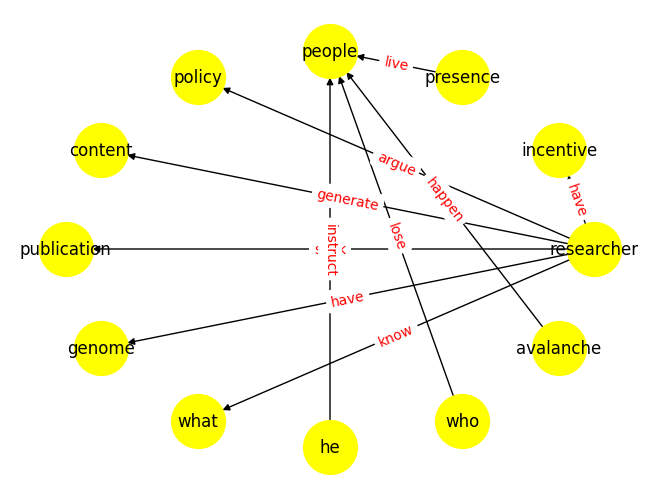

In [ ]:
draw_graph(pairs, 10)

# Задание 7
1.Сформировать или скачать семантический граф

2.Реализовать модель GCN применительно к этому графу для классификации вершин графа

3.Сравнить качество полученной модели с другими моделями

In [ ]:
data = CitationFull(root="/content/", name="Cora_ML")

Processing...
Done!


In [ ]:
class GCN(Module):
    def __init__(self, num_features, num_classes, hidden_dim=3):
        super().__init__()
        self.gcn = GCNConv(num_features, hidden_dim)
        self.out = Linear(hidden_dim, num_classes)

    def forward(self, x, edge_index):
        h = self.gcn(x, edge_index).relu()
        z = self.out(h)
        return h, z

In [ ]:
def accuracy(pred_y, y):
    return (pred_y == y).sum() / len(y)

def train(model, data, optimizer, criterion, n_epochs):
    for epoch in range(n_epochs):
        optimizer.zero_grad()
        h, z = model(data.x, data.edge_index)
        loss = criterion(z, data.y)
        acc = accuracy(z.argmax(dim=1), data.y)

        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')
    return

In [ ]:
model = GCN(data.num_features, data.num_classes)
criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.02)
n_epochs = 141

train(model, data, optimizer, criterion, n_epochs)

Epoch   0 | Loss: 1.91 | Acc: 16.39%
Epoch  10 | Loss: 1.25 | Acc: 56.89%
Epoch  20 | Loss: 0.86 | Acc: 66.74%
Epoch  30 | Loss: 0.58 | Acc: 83.11%
Epoch  40 | Loss: 0.42 | Acc: 89.18%
Epoch  50 | Loss: 0.32 | Acc: 92.15%
Epoch  60 | Loss: 0.25 | Acc: 94.86%
Epoch  70 | Loss: 0.20 | Acc: 96.23%
Epoch  80 | Loss: 0.16 | Acc: 97.40%
Epoch  90 | Loss: 0.13 | Acc: 98.03%
Epoch 100 | Loss: 0.11 | Acc: 98.46%
Epoch 110 | Loss: 0.09 | Acc: 98.86%
Epoch 120 | Loss: 0.08 | Acc: 99.00%
Epoch 130 | Loss: 0.07 | Acc: 99.30%
Epoch 140 | Loss: 0.06 | Acc: 99.33%


In [ ]:
logreg = LogisticRegression(max_iter=500, C=0.7).fit(data.x, data.y)

In [ ]:
y_preds = logreg.predict(data.x)
print(f"accuracy: {accuracy_score(data.y, y_preds):.5f}")

accuracy: 0.99633


Как видим, модели выдают одно и то же качество на наших данных